In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

Open images in the image folder.

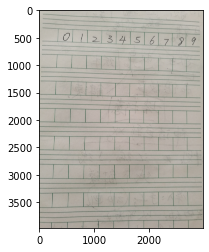

In [4]:
folder_path = "./source/"
images = []
for file_name in os.listdir(folder_path):
    images.append(cv2.imread(folder_path + file_name))

plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))

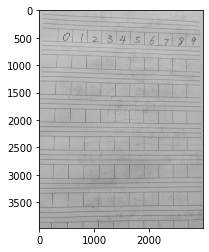

In [6]:
def remove_green_lattice(image):
    # Extract channels
    blue_c, green_c, red_c = cv2.split(image)

    _, thresh = cv2.threshold(green_c, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # filter_condition = int(thresh * 0.95)

    # _, red_thresh = cv2.threshold(green_c, filter_condition, 255, cv2.THRESH_BINARY)

    # Convert to 3 channels
    result_img = np.expand_dims(green_c, axis=2)
    result_img = np.concatenate((result_img, result_img, result_img), axis=-1)
 
    return result_img

img = images[0]
img = remove_green_lattice(img)
plt.imshow(img, cmap="gray")


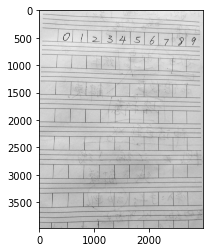

In [8]:
blue_c, green_c, red_c = cv2.split(img)
plt.imshow(blue_c, cmap="gray")
# plt.imshow(green_c, cmap="gray")
# plt.imshow(red_c, cmap="gray")